# Logistic Regression

This Logistic Regression walkthrough will use the famous titanic dataset. You can dowload this data from Kaggle or other open-source websites. Make sure your data is in the same directory as your notebook!

The titanic dataset holds (simulated) information about passengers onboard. We will use a logistic regression to simulate whether the passengers surived (1) or did not surivive (0).

Overview of Variables:
    
    Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    survival: Survival (0 = No; 1 = Yes)
    name: Name
    sex: Sex
    age: Age
    sibsp: Number of Siblings/Spouses Aboard
    parch: Number of Parents/Children Aboard
    ticket: Ticket Number
    fare: Passenger Fare (British pound)
    cabin: Cabin
    embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Imports and Initial Analysis

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Let's import the data and take sneak-peak
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Call .info method on the dataframe to see more information on
# our data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It seems we have some missing data in 3 columns. Let's visualize this further to see the proportion of data is missing in each column, so we can decide on an imputation method if needed.

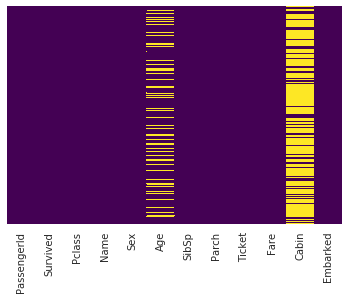

In [19]:
# Create a heatmap representing the proportion of missing data.
# Feel free to check out the hashed out customizations or leave
# as is.

sns.heatmap(train.isnull()
            #, yticklabels=False
            #,cbar=False, cmap='viridis'
           )

In [6]:
# Optional code to set seaborn plots with white grid
sns.set_style('whitegrid')

Let's continue our analysis by visualizing some of these columns individually. Feel free to go beyond what you see here!

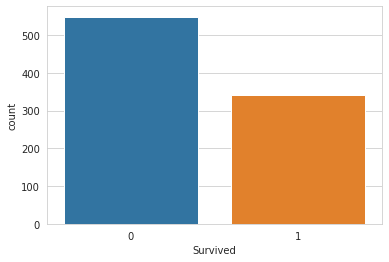

In [41]:
# Let's check out how many passengers surivived the titanic.
# Unhash the code when you're ready to view the distribution
# of men and women who survived. Does what you see make sense?

sns.countplot(x='Survived', data=train
             #, hue='Sex'
             #, palette = 'RdBu_r'
             )

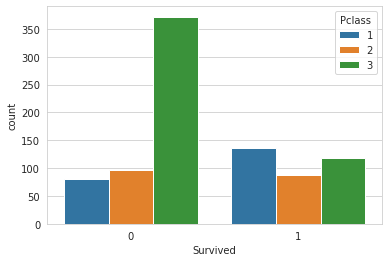

In [21]:
# Let's determine how many passengers from each class surivived.

sns.countplot(x='Survived', data=train
             , hue='Pclass'
             )

ValueError: cannot convert float NaN to integer

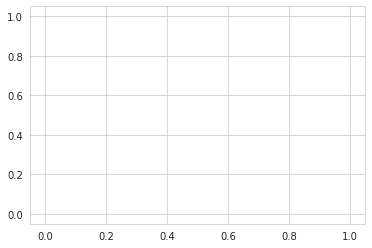

In [27]:
# Plot the distribution of 'Age'. Notice how this results in an 
# error? How can we fix this?

sns.distplot(train['Age'])

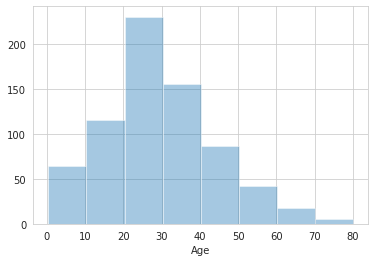

In [29]:
# Drop the null values for the sake of visiualization and set
# kde = False. This should result in the graph we were looking for.

sns.distplot(train['Age'].dropna(), kde=False, bins=8)

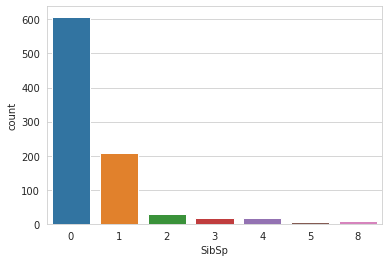

In [30]:
# How many people on board were traveling alone? How many were
# travelling with large families?

sns.countplot(x='SibSp', data= train)

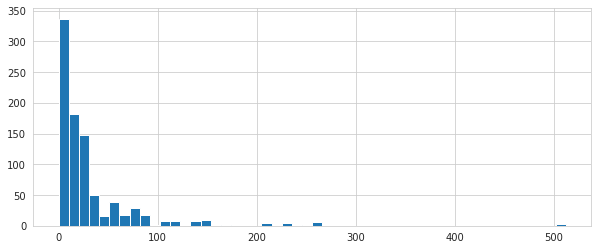

In [35]:
# What was the distribution of fare prices for the ship?

train['Fare'].hist(bins=50,figsize=(10,4))

### Optional Interactive Graph 

Let's visualize the exact same graph with Plotly! If you have never used this library before, you will have to pip (or conda) install plotly and cufflinks. I would highly recommend downloading these libraries.

In [36]:
import cufflinks as cf

In [38]:
cf.go_offline()

In [42]:
# Make an interactive graph for fare price distribution
train['Fare'].iplot(kind='hist', bins = 50)

### Data Imputation

We noted before that we have missing data in some columns. Filling in missing data with synthetic values is known as data imputation. Recall the age column had some missing values. We could fill this in with the average age. Let's go one step further and analyze the average age for each passenger class.

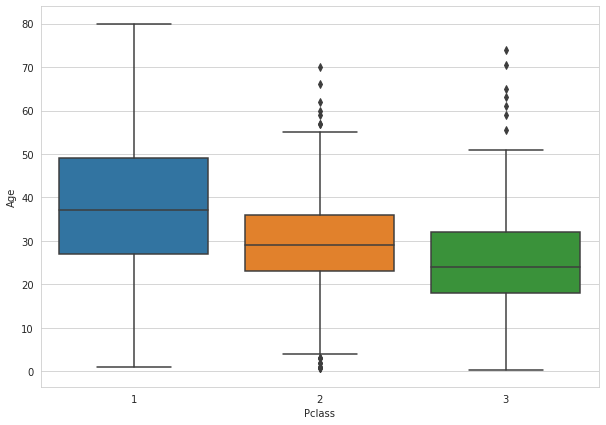

In [49]:
# Graph the distribtion of age over classes
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [50]:
# Calculate the average age for each class

age_1 = train[train['Pclass']==1]['Age'].mean()
age_2 = train[train['Pclass']==2]['Age'].mean()
age_3 = train[train['Pclass']==3]['Age'].mean()

print('Average age in class 1 : ', age_1)
print('Average age in class 2 : ', age_2)
print('Average age in class 3 : ', age_3)

Average age in class 1 :  38.233440860215055
Average age in class 2 :  29.87763005780347
Average age in class 3 :  25.14061971830986


It is clear from the graph (and verified by the cell above) that the average age is different among classes. Great! We can use this to determine a smarter way of filling in missing data.

In [54]:
# Write a function that returns the average age for missing values

def average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return age_1
        elif Pclass ==2:
            return age_2
        else:
            return age_3
    else:
        return Age

In [55]:
# Apply this function to our actual data across the columns(axis=1)

train['Age'] = train[['Age', 'Pclass']].apply(average_age, axis=1)

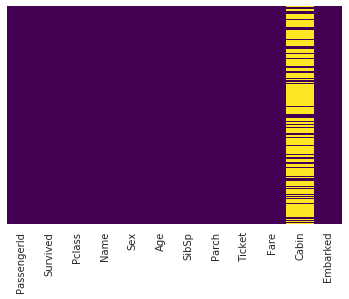

In [56]:
# Check if this worked by calling the same heatmap we used before

sns.heatmap(train.isnull()
            , yticklabels=False
            ,cbar=False, cmap='viridis'
           )

There is no more missing values for age. What about Cabin column? Since there is so much missing information for Cabin, we will just drop the column. Mean data imputation would cause bias if more than half the values are missing.

In [ ]:
# Drop the Cabin column. Make sure the drop occurs in place!
# If you try to rerun this cell, you will receive an error below
# stating that Cabin could not be found in the axis (since it has
# been dropped).

train.drop('Cabin', axis=1, inplace=True)

In [60]:
# Check that it worked
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [64]:
# Check if there are any other missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [65]:
# We have 2 missing values in the Embarked column. Since 2
# is a small number in comparison to our dataset, let's drop these
# rows entirely.

train.dropna(inplace=True)

In [66]:
# Check that all columns have the same number of values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Nice job!

### One Hot Encoding & Dummy Variables

Since computers prefer numbers to words, we must convert our categorical columns into what is known as dummy variables. This technique is commonly referred to as one-hot-encoding. Consider the Embarked column, which has 3 possible letters representing port cities. We will create a new column for each city, and place a 1 wherever that port was present, and a 0 otherwise.

Let's check out what a dummy variable for Male and Female might look like, by applying this technique on the Sex column.

In [67]:
# Create dummy variables for the Sex Column
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Now it is clear that whenever there is a 0 in the female column,  there is a 1 in the male column. This can lead to an issue called 'multi colinearity'. Don't worry about that too much right now, just remember to add an additional argument "drop_first" when you fear this might cause issues.

In [69]:
 # Create dummy variables for the Sex Column
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [71]:
# Let's do the same for embark, we expect there to be 2 columns
# generated from this column.

embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [74]:
# Add these new dataframes into our original dataframe

train = pd.concat([train, sex, embark], axis=1)

In [ ]:
# Drop the columns we used for our dummy variables, and other
# columns that have little to no use for prediction

train.drop(['Sex','Embarked', 'Name', 'Ticket'],inplace=True, axis=1)

In [76]:
# Confirm we have only relevant, numeric columns lef 

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,1


Beautiful!

In [78]:
# Drop the PassengerId column since it is essentially just an
# additional index, and will bring no use to our model

train.drop(['PassengerId'],inplace=True, axis=1)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,1


Since Pclass is technically an ordinal categorical variable (a categorical variable in which order matters, like small, medium, and large), we will leave it for now. The issue with ordinal variables is that the computer will think 3 > 2 > 1, when in reality we know that Class 1 is the highest ranked class. This may lead to some issues, and we may decide to retrain the algorithm with dummy variables on Pclass.

### Training Time!

In [95]:
# Import relevant libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Set y equal to the target variable
y = train['Survived']

# Set X equal to the independent variables
X = train.drop('Survived', axis=1 , inplace=True)

In [94]:
# Split your data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size =0.33,
                                        random_state=101)

In [96]:
# Initiate the Logisitc Regression Model
logmodel = LogisticRegression()

In [97]:
# Fit the model
logmodel.fit(X_train, y_train)

/home/hanna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Make the predicitions
prediction = logmodel.predict(X_test)

Yes, it is really that simple! The tools we have today make simple ML tasks as easy as these lines of code. The magic really happens in our data cleaning from before.

### Evaluation

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
# Print the evaluation metrics of our model

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       174
           1       0.83      0.65      0.73       120

    accuracy                           0.80       294
   macro avg       0.81      0.78      0.79       294
weighted avg       0.81      0.80      0.80       294



In [189]:
# Print the confusion matrix for our model
cnf_matrix = confusion_matrix(y_test,prediction)
cnf_matrix

array([[158,  16],
       [ 42,  78]])

Text(0.5, 257.44, 'Predicted label')

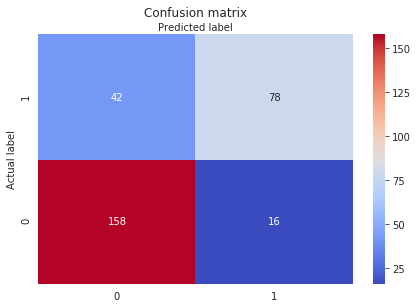

In [201]:
# Optional -- pretty graph of confusion matrix <3
# Warning: numbers may be flipped

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,2])
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The model received an accuracy of 80%. That's pretty good, but we can do better!

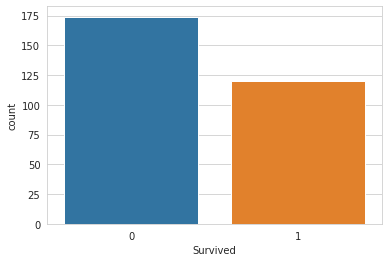

In [185]:
# Graph the actual distribution of survived vs. did not survive
sns.countplot(y_test)

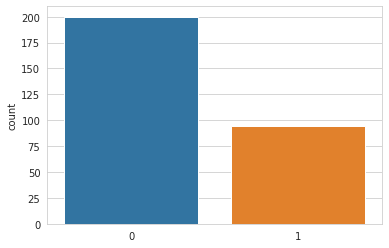

In [187]:
# Graph the predicted distribution of survived vs. did not survive
sns.countplot(prediction)

We can see from the plots above that our model underestimated the number of people that survived the titanic. Perhaps we should adjust the probability threshold and try again.